# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2019

In [1]:
%run 'analysis-2019.ipynb'

### Run analysis for 2020

In [2]:
%run 'analysis-2020.ipynb'

### Run analysis for 2021

In [3]:
%run 'analysis-2021.ipynb'

### Run analysis for 2022

In [4]:
%run 'analysis-2022.ipynb'

## Import all rules results

In [5]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Dependencia administrativa nao informada'],0.713842,0.713842,1.000000,2019
1,[],['Entre 17 e 25 anos'],0.813179,0.813179,1.000000,2019
2,[],['Feminino'],0.537954,0.537954,1.000000,2019
3,[],['Já concluí o Ensino Médio'],0.528198,0.528198,1.000000,2019
4,[],['NOTA: MUITO ACIMA DA MÉDIA'],0.644401,0.644401,1.000000,2019
...,...,...,...,...,...,...
278212,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Não Respondeu'],0.262830,1.000000,1.690941,2022
278213,"['Tem celular', 'Não Respondeu', 'Tem computad...",['NOTA: MUITO ACIMA DA MÉDIA'],0.262830,0.914443,1.878094,2022
278214,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Já concluí o Ensino Médio'],0.262830,0.957975,2.036746,2022
278215,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Entre 17 e 25 anos'],0.262830,0.926237,1.094921,2022


## ECDF - Support x Association Rules Qty

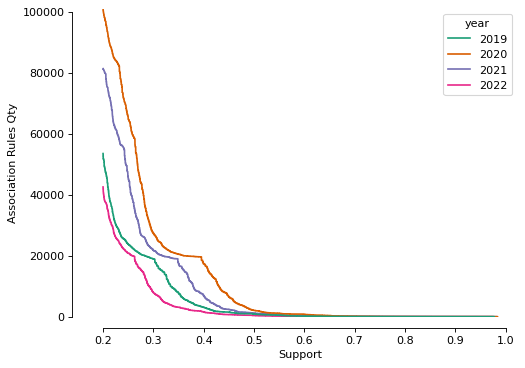

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

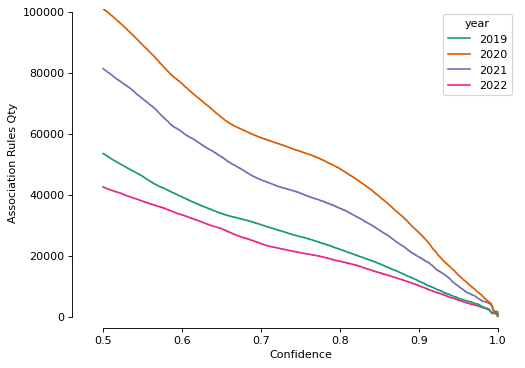

In [7]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

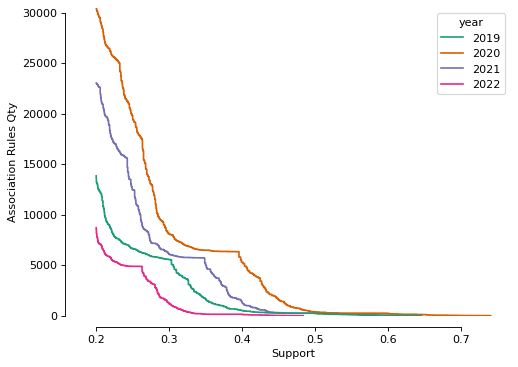

In [8]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

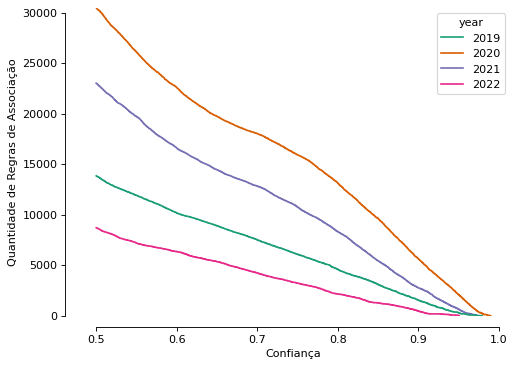

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

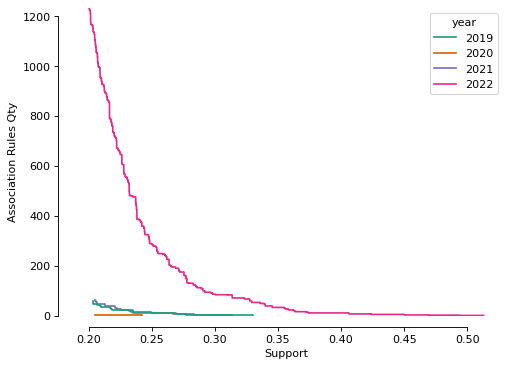

In [10]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

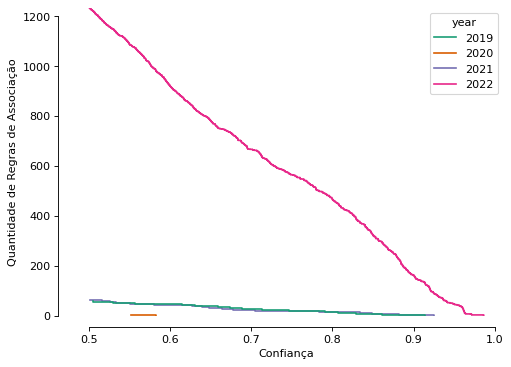

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [12]:
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")
relevant_rules_table_2020 = rules_table_2020.query("lift > 1.1")
relevant_rules_table_2021 = rules_table_2021.query("lift > 1.1")
relevant_rules_table_2022 = rules_table_2022.query("lift > 1.1")

print("2019: " + str(relevant_rules_table_2019['items_base'].count()))
print("2020: " + str(relevant_rules_table_2020['items_base'].count()))
print("2021: " + str(relevant_rules_table_2021['items_base'].count()))
print("2022: " + str(relevant_rules_table_2022['items_base'].count()))

2019: 44715
2020: 83251
2021: 68243
2022: 35169


## Recurring rules

In [13]:
intersec_19_20 = pd.merge(relevant_rules_table_2019, relevant_rules_table_2020, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))
intersec_19_20_21 = pd.merge(intersec_19_20, relevant_rules_table_2021, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_z', '_w'))
intersec_all_years = pd.merge(intersec_19_20_21, relevant_rules_table_2022, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
1,['NOTA: MUITO ACIMA DA MÉDIA'],['Branco'],0.420352,0.652314,1.321009,2019,0.493427,0.666475,1.220094,2020,0.453407,0.701985,1.298055,2021,0.348986,0.716752,1.518887,2022
2,['Região Sudeste'],['Branco'],0.258480,0.653939,1.324299,2019,0.282636,0.692703,1.268110,2020,0.258736,0.697684,1.290101,2021,0.209693,0.658933,1.396361,2022
3,['Branco'],['Tem computador'],0.427421,0.865575,1.243700,2019,0.489947,0.896930,1.185801,2020,0.479100,0.885913,1.218788,2021,0.383536,0.812761,1.357600,2022
4,['Tem computador'],['Branco'],0.427421,0.614139,1.243700,2019,0.489947,0.647742,1.185801,2020,0.479100,0.659118,1.218788,2021,0.383536,0.640641,1.357600,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27158,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Tem computador'],0.303082,0.928756,1.334483,2019,0.395547,0.931496,1.231500,2020,0.348657,0.946733,1.302461,2021,0.262830,0.936766,1.564733,2022
27159,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Não Respondeu'],0.303082,1.000000,1.552426,2019,0.395547,1.000000,1.454513,2020,0.348657,1.000000,1.570452,2021,0.262830,1.000000,1.690941,2022
27160,"['Tem celular', 'Não Respondeu', 'Tem computad...",['NOTA: MUITO ACIMA DA MÉDIA'],0.303082,0.940564,1.459593,2019,0.395547,0.968805,1.308571,2020,0.348657,0.951066,1.472485,2021,0.262830,0.914443,1.878094,2022
27161,"['Tem celular', 'NOTA: MUITO ACIMA DA MÉDIA', ...",['Já concluí o Ensino Médio'],0.303082,0.952343,1.803003,2019,0.395547,0.970956,1.592895,2020,0.348657,0.964863,1.805401,2021,0.262830,0.957975,2.036746,2022


## Save results to a new CSV file

In [14]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [15]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
17,['Região Sudeste'],['NOTA: MUITO ACIMA DA MÉDIA'],0.323507,0.818455,1.270101,2019,0.360537,0.883630,1.193523,2020,0.304880,0.822112,1.272832,2021,0.225417,0.708344,1.454806,2022
19,['Tem computador'],['NOTA: MUITO ACIMA DA MÉDIA'],0.596552,0.857155,1.330157,2019,0.689187,0.911152,1.230697,2020,0.613787,0.844413,1.307359,2021,0.458656,0.766119,1.573466,2022
24,['Branco'],"['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.305616,0.618908,1.296620,2019,0.348253,0.637536,1.178361,2020,0.320624,0.592873,1.257854,2021,0.248030,0.525608,1.475557,2022
25,"['Branco', 'Dependencia administrativa nao inf...",['NOTA: MUITO ACIMA DA MÉDIA'],0.305616,0.855366,1.327380,2019,0.348253,0.893050,1.206247,2020,0.320624,0.841117,1.302257,2021,0.248030,0.753208,1.546949,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27137,"['Tem celular', 'Tem computador', 'Dependencia...","['NOTA: MUITO ACIMA DA MÉDIA', 'Não Respondeu']",0.303082,0.940564,2.160242,2019,0.395547,0.968805,1.839966,2020,0.348657,0.951066,2.062371,2021,0.262830,0.914443,2.615804,2022
27143,"['Tem celular', 'Não Respondeu', 'Tem computad...","['Já concluí o Ensino Médio', 'NOTA: MUITO ACI...",0.303082,0.876412,2.293198,2019,0.395547,0.929927,1.893960,2020,0.348657,0.892200,2.088898,2021,0.262830,0.841103,2.612489,2022
27148,"['Tem celular', 'Não Respondeu', 'Tem computad...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.303082,0.856729,1.514329,2019,0.395547,0.885764,1.328239,2020,0.348657,0.863096,1.491747,2021,0.262830,0.834777,1.900640,2022
27155,"['Tem celular', 'Não Respondeu', 'Tem computad...","['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.303082,0.940564,1.970494,2019,0.395547,0.968805,1.790647,2020,0.348657,0.951066,2.017806,2021,0.262830,0.914443,2.567145,2022


In [16]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
5,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.330243,0.716345,2.014476,2019,0.242099,0.582680,2.244132,2020,0.313478,0.710366,2.006073,2021,0.469317,0.821316,1.600692,2022
96,"['Solteiro(a)', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.283143,0.694151,1.952064,2019,0.204709,0.551795,2.125181,2020,0.277364,0.694516,1.961311,2021,0.423755,0.812786,1.584066,2022
98,['Classe Social E'],"['Tem celular', 'NOTA: MUITO ABAIXO DA MÉDIA']",0.314322,0.681809,2.009069,2019,0.231316,0.556728,2.238542,2020,0.301343,0.682868,1.999126,2021,0.450172,0.787812,1.597018,2022
100,"['Tem celular', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.314322,0.708923,1.993603,2019,0.231316,0.574260,2.211705,2020,0.301343,0.704260,1.988830,2021,0.450172,0.816986,1.592252,2022


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [17]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

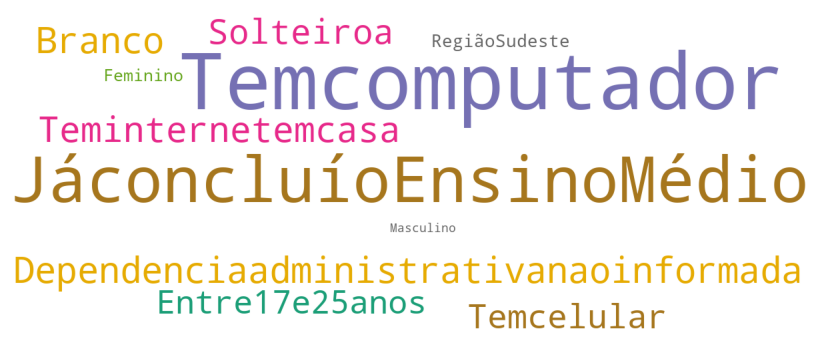

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [19]:
all_low = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

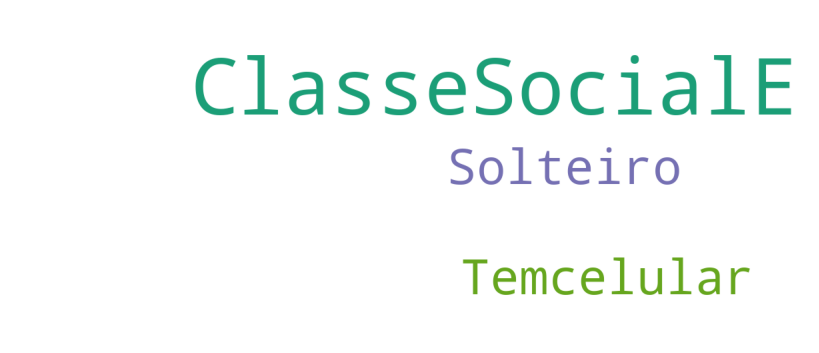

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()